In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

Reading the cleaned data

In [2]:
data = pd.read_csv("./clean_data/creditcard_application_clean_data.csv") 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   FLAG_OWN_CAR         36457 non-null  int64  
 2   FLAG_OWN_REALTY      36457 non-null  int64  
 3   ANNUAL_INCOME        36457 non-null  float64
 4   NAME_INCOME_TYPE     36457 non-null  int64  
 5   NAME_EDUCATION_TYPE  36457 non-null  int64  
 6   NAME_HOUSING_TYPE    36457 non-null  int64  
 7   AGE_YEARS            36457 non-null  float64
 8   EMPLOYMENT_LENGTH    36457 non-null  float64
 9   FLAG_MOBIL           36457 non-null  int64  
 10  FLAG_WORK_PHONE      36457 non-null  int64  
 11  FLAG_PHONE           36457 non-null  int64  
 12  FLAG_EMAIL           36457 non-null  int64  
 13  STATUS               36457 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 3.9 MB


In [4]:
data.shape

(36457, 14)

In [5]:
data.head()

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,ANNUAL_INCOME,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,AGE_YEARS,EMPLOYMENT_LENGTH,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,STATUS
0,5008804,1,1,0.2587,4,1,4,0.32,0.12,1,1,0,0,1
1,5008805,1,1,0.2587,4,1,4,0.32,0.12,1,1,0,0,1
2,5008806,1,1,0.0552,4,4,1,0.58,0.03,1,0,0,0,0
3,5008808,0,1,0.1570,0,4,1,0.52,0.08,1,0,1,1,0
4,5008809,0,1,0.1570,0,4,1,0.52,0.08,1,0,1,1,0


In [6]:
import xgboost as xgb

In [7]:
data.columns

Index(['ID', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'ANNUAL_INCOME',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE',
       'AGE_YEARS', 'EMPLOYMENT_LENGTH', 'FLAG_MOBIL', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'STATUS'],
      dtype='object')

In [8]:
# X - exclude ID(0) and status(13) columns
X = data.iloc[:,1:13]

# y - select only status(13) column
y = data.iloc[:,13]

In [9]:
X

,FLAG_OWN_CAR,FLAG_OWN_REALTY,ANNUAL_INCOME,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,AGE_YEARS,EMPLOYMENT_LENGTH,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL
0,1,1,0.2587,4,1,4,0.32,0.12,1,1,0,0
1,1,1,0.2587,4,1,4,0.32,0.12,1,1,0,0
2,1,1,0.0552,4,4,1,0.58,0.03,1,0,0,0
3,0,1,0.1570,0,4,1,0.52,0.08,1,0,1,1
4,0,1,0.1570,0,4,1,0.52,0.08,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
36452,1,1,0.1860,4,4,1,0.47,0.06,1,0,0,0
36453,0,1,0.0843,0,1,1,0.33,0.03,1,0,1,1
36454,0,1,0.0843,1,1,1,0.33,0.03,1,0,1,1
36455,0,1,0.1657,4,4,1,0.49,0.01,1,0,0,0


In [10]:
y

0        1
1        1
2        0
3        0
4        0
        ..
36452    1
36453    1
36454    1
36455    1
36456    1
Name: STATUS, Length: 36457, dtype: int64

### Splitting the data

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=235)

### Defining the model

In [12]:
xgb_cred = xgb.XGBClassifier(
    learning_rate =0.2,
    subsample=0.8,
    min_child_weight=50,
    n_estimators=100,
    max_depth=10,
    gamma=0.0,
    objective= 'binary:logistic'
)

### Fitting the model

In [13]:
xgb_cred.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=10, max_leaves=0, min_child_weight=50, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

### Using predict_proba function to get the probability for both of the classes, getting threshold and doing threshold tuning

In [14]:
# pred_class = xgb_cred.predict(X_test)
prob_credit = xgb_cred.predict_proba(X_test)

In [15]:
prob_credit

array([[0.94219   , 0.05781001],
       [0.870894  , 0.12910599],
       [0.84423685, 0.15576318],
       ...,
       [0.9258818 , 0.07411822],
       [0.95875293, 0.04124707],
       [0.9320458 , 0.06795416]], dtype=float32)

#### Getting threshold using ROC curve

In [16]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds =roc_curve(y_test, prob_credit[:,1])

from numpy import argmax 
ix = argmax(tpr - fpr)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

Best Threshold=0.116431


#### Threshold tuning

In [17]:
prob_credit_new = prob_credit[:,1]

In [18]:
prob_credit_new

array([0.05781001, 0.12910599, 0.15576318, ..., 0.07411822, 0.04124707,
       0.06795416], dtype=float32)

#### Getting 88th percentile (100-threshold)

In [19]:
np.quantile(prob_credit_new, 0.88)

0.18998706340789795

#### Classifying everything above 88th percentile into class 1

In [20]:
y_pred = np.where(prob_credit_new>=0.19,1,0)

In [21]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

### Checking feature importance using XGBoost

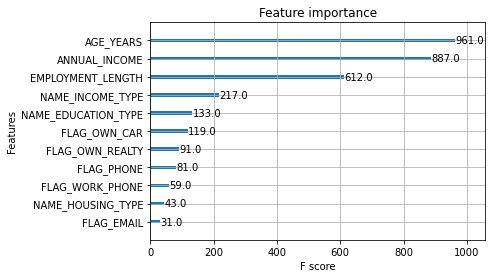

In [22]:
xgb.plot_importance(xgb_cred)
plt.rcParams['figure.figsize'] = [16, 10]
plt.show()

### Evaluation

Accuracy:  82.48765770707624 %
Precision:  26.43020594965675 %
Recall:  26.705202312138727 %


[Text(0.5, 69.0, 'Predicted'), Text(123.0, 0.5, 'Actual')]

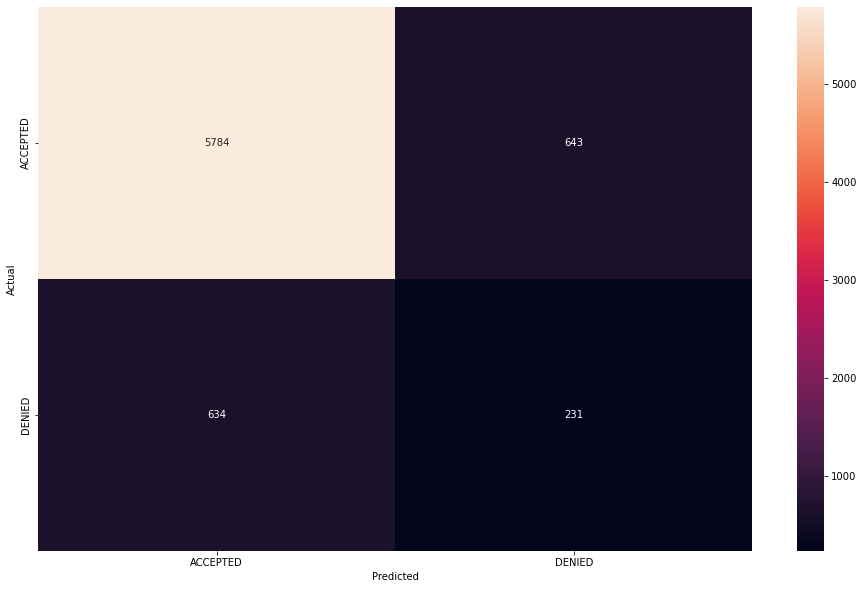

In [23]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Accuracy: ", accuracy * 100.0, "%")
print("Precision: ", precision * 100.0, "%")
print("Recall: ", recall * 100.0, "%")

cm = confusion_matrix(y_test, y_pred)
labels = ['ACCEPTED', 'DENIED']
ax= sns.heatmap(cm, annot = True, fmt = 'g', xticklabels=labels, yticklabels=labels)
ax.set(xlabel="Predicted", ylabel="Actual")

### ROC Curve

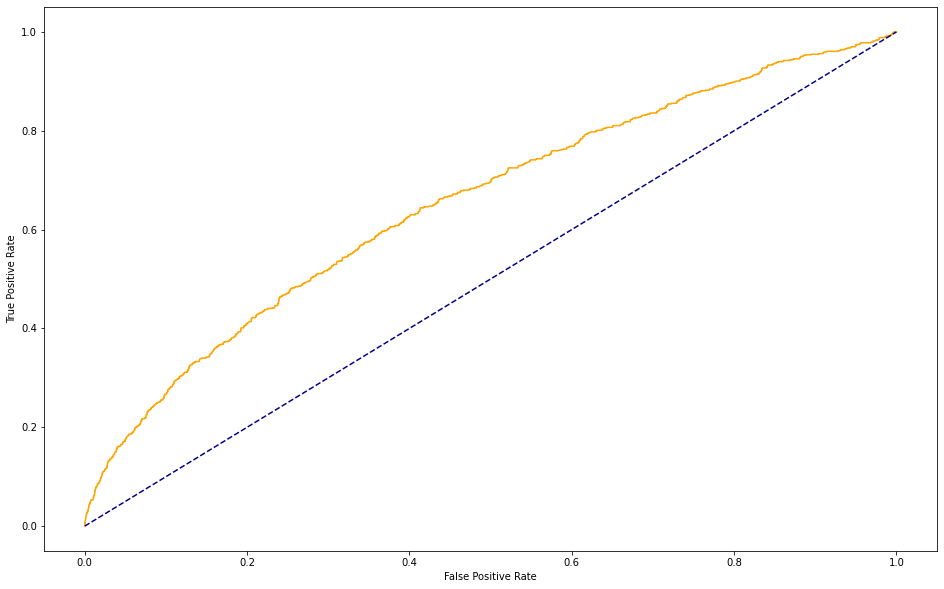

In [24]:
fpr, tpr, thresholds =roc_curve(y_test, prob_credit_new)

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


# Hyper parameter optimization using Grid Search

In [25]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBClassifier

params = {
    'learning_rate': [0.05,0.1,0.15,0.2],
    'gamma':[0.0,0.1,0.2,0.3,0.4],
    'min_child_weight':[6,8,10,12],
    'max_depth':[10,15],
    'subsample': [0.6,0.7,0.8], 
    'colsample_bytree':[0.5,0.6,0.7]
}

gs = GridSearchCV(
    estimator = XGBClassifier( 
        learning_rate =0.1,
        max_depth=10,
        min_child_weight=50,
        subsample=0.6,
        n_estimators=100,
        objective= 'binary:logistic'), 
    param_grid = params,
    scoring='roc_auc',
    n_jobs=4, 
    cv=5)

gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, m...
                                     max_leaves=None, min_child_weight=50,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                          

#### Getting best parameters

In [26]:
gs.best_params_, gs.best_score_

({'colsample_bytree': 0.7,
  'gamma': 0.3,
  'learning_rate': 0.2,
  'max_depth': 15,
  'min_child_weight': 6,
  'subsample': 0.8},
 0.7211680459970174)

#### Creating new model using optimized parameters

In [27]:
optimized_xgbcred = xgb.XGBClassifier(
    colsample_bytree=0.7,
    gamma=0.3,
    learning_rate =0.2,
    max_depth=15,
    min_child_weight=6,
    subsample=0.8,
    n_estimators=100,
    objective= 'binary:logistic'
)
optimized_xgbcred.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.3, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=15, max_leaves=0, min_child_weight=6, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

#### Threshold tuning

In [28]:
prob_credit2 = optimized_xgbcred.predict_proba(X_test)
prob_credit_new2 = prob_credit2[:,1]

fpr2, tpr2, thresholds2 =roc_curve(y_test, prob_credit2[:,1])

from numpy import argmax 
ix = argmax(tpr2 - fpr2)
best_thresh2 = thresholds2[ix]
print('Best Threshold=%f' % (best_thresh2))

Best Threshold=0.129789


In [29]:
np.quantile(prob_credit_new2,0.88)

0.24123850464820862

## Evaluation

Accuracy:  85.98464070213933 %
Precision:  40.507859733978236 %
Recall:  38.72832369942196 %


[Text(0.5, 69.0, 'Predicted'), Text(123.0, 0.5, 'Actual')]

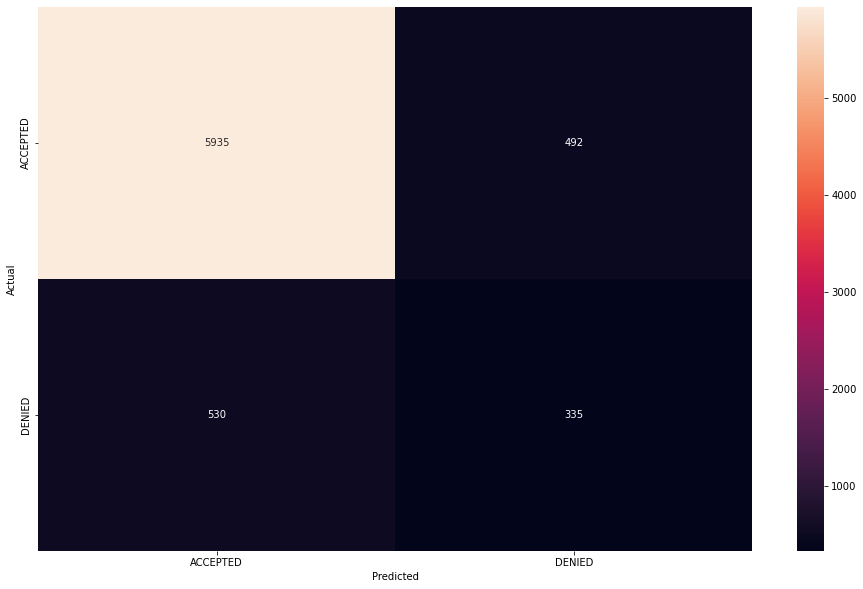

In [30]:
y_pred_final = np.where(prob_credit_new2>=0.25,1,0)

accuracy2 = accuracy_score(y_test, y_pred_final)
precision2 = precision_score(y_test, y_pred_final)
recall2 = recall_score(y_test, y_pred_final)
print("Accuracy: ", accuracy2 * 100.0, "%")
print("Precision: ", precision2 * 100.0, "%")
print("Recall: ", recall2 * 100.0, "%")

cm = confusion_matrix(y_test, y_pred_final)
ax= sns.heatmap(cm, annot = True, fmt = 'g', xticklabels=labels, yticklabels=labels)
ax.set(xlabel="Predicted", ylabel="Actual")

#### ROC Curve

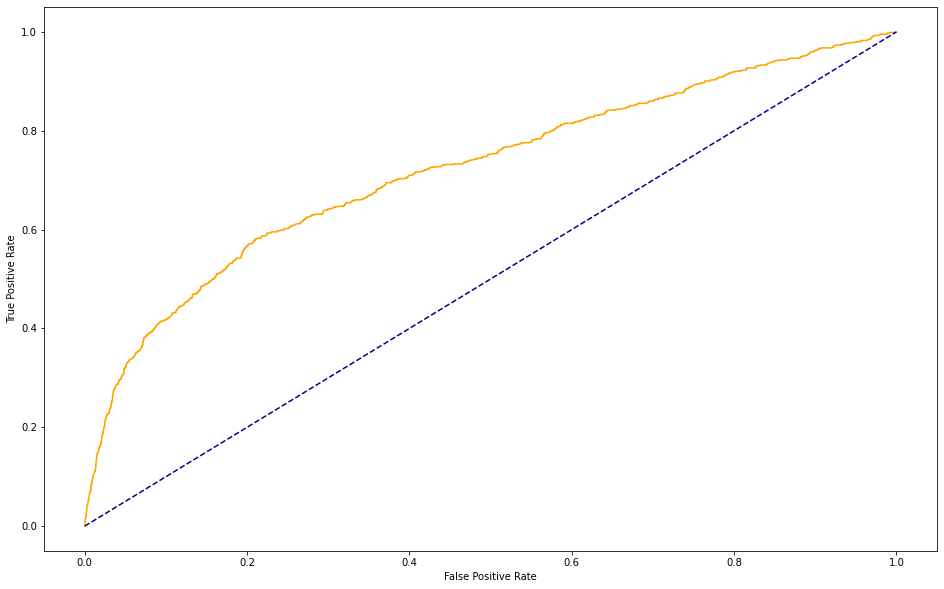

In [31]:
fpr, tpr, thresholds =roc_curve(y_test, prob_credit_new2)

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

#### PR Curve

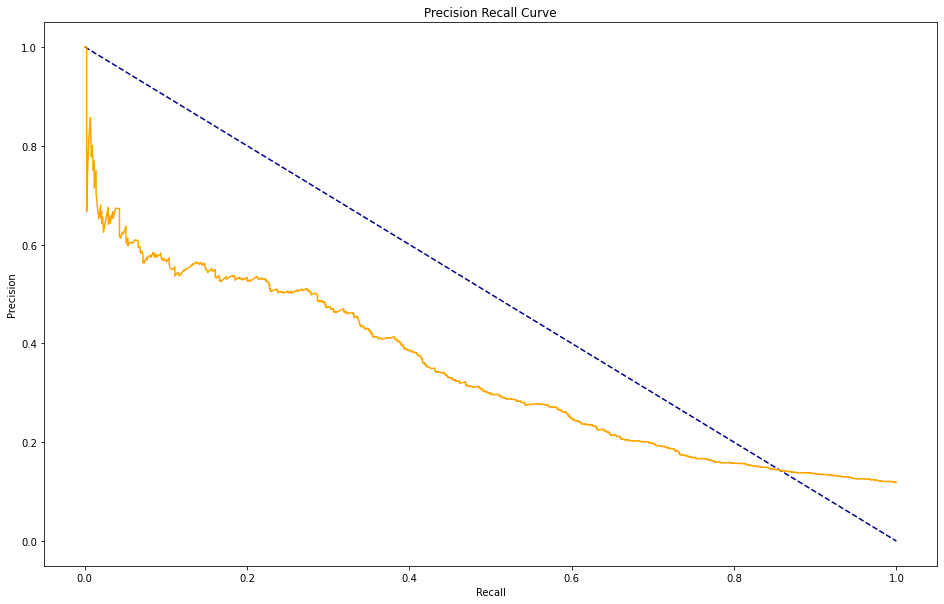

In [32]:
from sklearn.metrics import precision_recall_curve
model_precision, model_recall, thresholds = precision_recall_curve(y_test, prob_credit_new2)

plt.plot([0, 1], [1, 0], color='darkblue', linestyle='--')
plt.plot(model_recall, model_precision, color='orange')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

#### Comparing results with predict with predict_proba (Skipping threshold tuning)

Accuracy:  88.3433900164564 %
Precision:  52.72727272727272 %
Recall:  16.76300578034682 %


[Text(0.5, 69.0, 'Predicted'), Text(123.0, 0.5, 'Actual')]

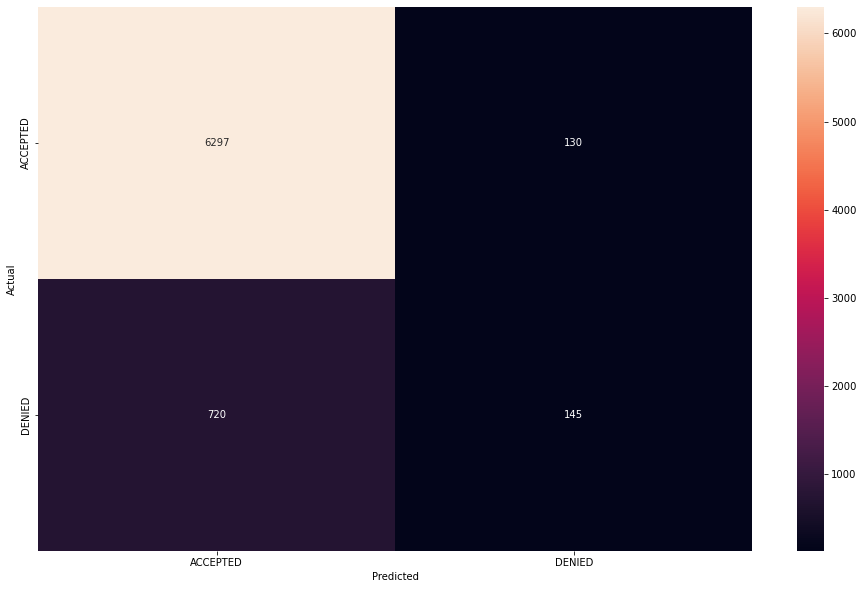

In [33]:
pred = optimized_xgbcred.predict(X_test)
accuracy_pred = accuracy_score(y_test, pred)
precision_pred = precision_score(y_test, pred)
recall_pred = recall_score(y_test, pred)
print("Accuracy: ", accuracy_pred * 100.0, "%")
print("Precision: ", precision_pred * 100.0, "%")
print("Recall: ", recall_pred * 100.0, "%")

cm2 = confusion_matrix(y_test, pred)

ax1= sns.heatmap(cm2, annot = True, fmt = 'g', xticklabels=labels, yticklabels=labels)
ax1.set(xlabel="Predicted", ylabel="Actual")

## Cross validation

In [34]:
from xgboost import cv

data_dmatrix = xgb.DMatrix(data=X,label=y)

params = {"objective":"binary:logistic",
  'colsample_bytree': 0.7,
  'gamma': 0.3,
  'learning_rate': 0.2,
  'max_depth': 15,
  'min_child_weight': 6,
  'subsample': 0.8}

xgb_cv = cv(dtrain=data_dmatrix, params=params, 
            nfold=10, num_boost_round=50, 
            early_stopping_rounds=10, metrics="auc", 
            as_pandas=True, seed=123)

In [35]:
xgb_cv.head()

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.577196,0.011156,0.553061,0.019695
1,0.653113,0.027487,0.590434,0.020550
2,0.690509,0.023729,0.613734,0.022419
3,0.714307,0.027939,0.630664,0.026715
4,0.745717,0.017183,0.645010,0.027020


In [36]:
xgb_cv.tail()

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
45,0.885701,0.001672,0.731618,0.014740
46,0.886599,0.001795,0.731653,0.014443
47,0.887537,0.001544,0.731908,0.014290
48,0.888541,0.001628,0.732646,0.013585
49,0.889618,0.001478,0.732504,0.013535


[Text(0.5, 0, 'Boost Round'), Text(0, 0.5, 'AUC')]

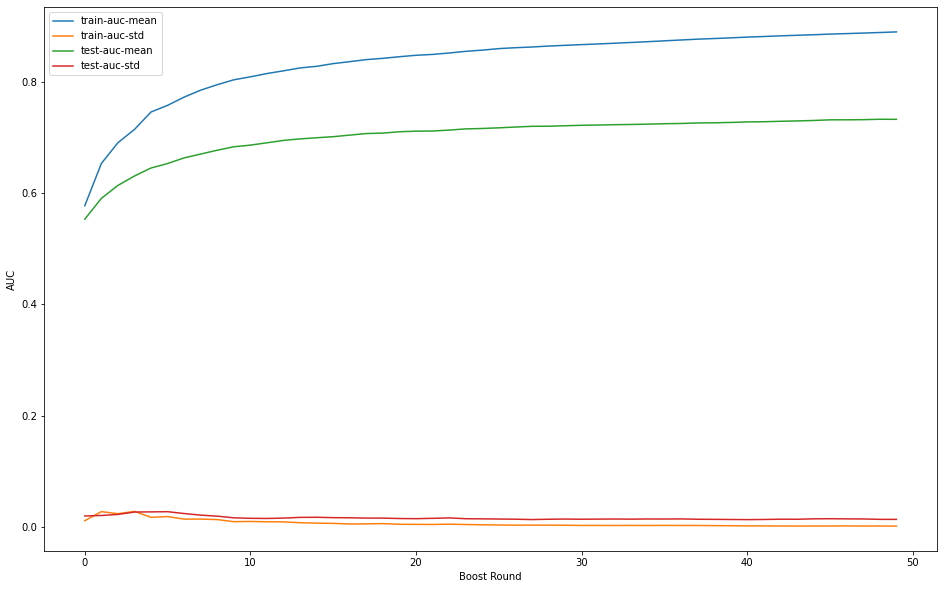

In [37]:
ax = sns.lineplot(data=xgb_cv, dashes=False)
ax.set(xlabel="Boost Round", ylabel="AUC")